# 改进模型拟合

有一个矛盾,为了达到完美的拟合,模型必须向过拟合,才能知道哪里是边界.

面对一个机器学习的问题,最初的目标是找到一个表现出一些泛化能力的模型,然后可以过拟合.之后的的事情是对抗过拟合改善模型的泛化能力.使其能达到第一个里程碑: 模型的表现要超过简单方法的基线.

在初始训练模型时常见的 3 个问题

- 训练无效,训练损失不会随着时间而减小.
- 训练效果很好,但是模型的效果无法打败基线.
- 训练和验证效果都很好,模型效果也超过了基线,但是似乎一直没有过拟合出现.


## 调整梯度下降的参数

有时候会碰到,无论如何训练,损失总是过早的停滞了.这个时候还记得前文对随机数据的实验吗?即使是随机的数据也能训练出一个模型,当然这个模型谈不上什么泛化能力.因此这个问题一定有办法解决.

通常这样的情况发生总是梯度下降的配置问题.

- 模型初始权重分布/优化器选择/学习率/批次大小等等都互相依赖.
- 其他调整学习率和批次大小就足够了,特别是学习率.


In [8]:
from keras.datasets import mnist
import tensorflow.keras as keras
import tensorflow.keras.layers as layers

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images,
          train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)


11501568/11490434 [==============================] - 5s 0us/step


2022-04-28 07:03:45.956716: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:925] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-04-28 07:03:45.981725: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:925] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-04-28 07:03:45.982150: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:925] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-04-28 07:03:45.982868: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

Epoch 1/10
375/375 [==============================] - 3s 6ms/step - loss: 964.5224 - accuracy: 0.3510 - val_loss: 2.2968 - val_accuracy: 0.1749
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 4.2257 - accuracy: 0.2199 - val_loss: 2.1806 - val_accuracy: 0.2170
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 2.6254 - accuracy: 0.2072 - val_loss: 2.4294 - val_accuracy: 0.1396
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 2.4756 - accuracy: 0.1986 - val_loss: 2.0513 - val_accuracy: 0.2293
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 2.8050 - accuracy: 0.1936 - val_loss: 2.9300 - val_accuracy: 0.2021
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 2.3984 - accuracy: 0.2091 - val_loss: 2.4353 - val_accuracy: 0.2367
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 2.5473 - accuracy: 0.2066 - val_loss: 2.1627 - val_accuracy: 0.1283
Epoc

学习率是 1 ,无论如何训练,模型的准确度一直都在 0.2 ~ 0.3 之间.接下来我们把学习率改成 1e-2.


In [9]:
from keras.datasets import mnist
import tensorflow.keras as keras
import tensorflow.keras.layers as layers

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images,
          train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3825 - accuracy: 0.9106 - val_loss: 0.1418 - val_accuracy: 0.9588
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1425 - accuracy: 0.9634 - val_loss: 0.1414 - val_accuracy: 0.9672
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1183 - accuracy: 0.9728 - val_loss: 0.1898 - val_accuracy: 0.9641
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1009 - accuracy: 0.9776 - val_loss: 0.2177 - val_accuracy: 0.9645
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0893 - accuracy: 0.9808 - val_loss: 0.2325 - val_accuracy: 0.9668
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0809 - accuracy: 0.9843 - val_loss: 0.2366 - val_accuracy: 0.9706
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0688 - accuracy: 0.9863 - val_loss: 0.2751 - val_accuracy: 0.9688
Epoch 

调整过学习率,模型训练就正常多了..

如果出现损失一直无法降低等情况

- 降低或提高学习率.过高的学习率会使更新大大超过适当的拟合范围,模型就一直在这个范围左右反复横跳.过低的学习率反而使得学习的速度非常慢,简单的几轮训练验证几乎完全不可能够到合适的拟合范围.
- 增加批次大小,批次的样本更多,会使得信息量加大,噪音相对更小.

以上,终于有一个能让训练开始的配置了.


## 更好的结构以改进结果

好了,现在有了一个初步能训练的模型了.但是在测试集上的指标无论怎样都没能超过基线.这或许是能遇到的最糟糕的情况了.根本上遇到了问题,没有通用解决方案,只有一些提示.

- 输入数据根本没有包含所需要的信息量.
- 使用的神经网络架构不适合这个问题.大部分机器学习的问题上都有类似最佳实践的网络架构.尝试换用更适合架构.


## 增大模型容量

一旦获得了合适的模型,下一步是将这个模型过拟合,探索欠拟合/过拟合的边界.

还是一个 mnist 的例子


In [10]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])  #一个输出层
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(train_images,
                                train_labels,
                                epochs=40,
                                batch_size=128,
                                validation_split=0.2)  #抽取 0.2 作为验证集


Epoch 1/40
375/375 [==============================] - 2s 5ms/step - loss: 0.6667 - accuracy: 0.8339 - val_loss: 0.3565 - val_accuracy: 0.9042
Epoch 2/40
375/375 [==============================] - 2s 5ms/step - loss: 0.3506 - accuracy: 0.9041 - val_loss: 0.3075 - val_accuracy: 0.9152
Epoch 3/40
375/375 [==============================] - 2s 4ms/step - loss: 0.3152 - accuracy: 0.9131 - val_loss: 0.2894 - val_accuracy: 0.9194
Epoch 4/40
375/375 [==============================] - 2s 5ms/step - loss: 0.2989 - accuracy: 0.9163 - val_loss: 0.2818 - val_accuracy: 0.9218
Epoch 5/40
375/375 [==============================] - 2s 5ms/step - loss: 0.2888 - accuracy: 0.9194 - val_loss: 0.2777 - val_accuracy: 0.9233
Epoch 6/40
375/375 [==============================] - 2s 4ms/step - loss: 0.2823 - accuracy: 0.9210 - val_loss: 0.2714 - val_accuracy: 0.9260
Epoch 7/40
375/375 [==============================] - 2s 5ms/step - loss: 0.2776 - accuracy: 0.9226 - val_loss: 0.2691 - val_accuracy: 0.9262
Epoch 

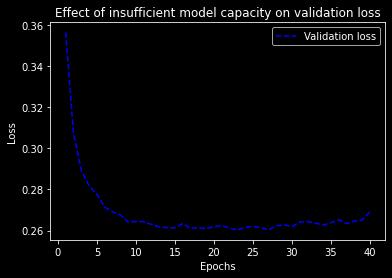

In [11]:
import matplotlib.pyplot as plt

val_loss = history_small_model.history["val_loss"]
epochs = range(1, 41)
plt.plot(epochs, val_loss, "b--", label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

只有一个层,原书是 20 次,这里改成 40 次,似乎结果也一样,验证损失停留在了 0.26,并没有随着训练轮次表现出过拟合.


In [12]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(train_images,
                                train_labels,
                                epochs=20,
                                batch_size=128,
                                validation_split=0.2)  #抽取 0.2 作为验证集


Epoch 1/20
375/375 [==============================] - 3s 6ms/step - loss: 0.3692 - accuracy: 0.8964 - val_loss: 0.1936 - val_accuracy: 0.9437
Epoch 2/20
375/375 [==============================] - 2s 6ms/step - loss: 0.1627 - accuracy: 0.9513 - val_loss: 0.1339 - val_accuracy: 0.9609
Epoch 3/20
375/375 [==============================] - 2s 6ms/step - loss: 0.1150 - accuracy: 0.9655 - val_loss: 0.1144 - val_accuracy: 0.9656
Epoch 4/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0885 - accuracy: 0.9740 - val_loss: 0.1041 - val_accuracy: 0.9690
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0706 - accuracy: 0.9788 - val_loss: 0.0964 - val_accuracy: 0.9712
Epoch 6/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0579 - accuracy: 0.9822 - val_loss: 0.0976 - val_accuracy: 0.9715
Epoch 7/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0481 - accuracy: 0.9857 - val_loss: 0.0975 - val_accuracy: 0.9721
Epoch 

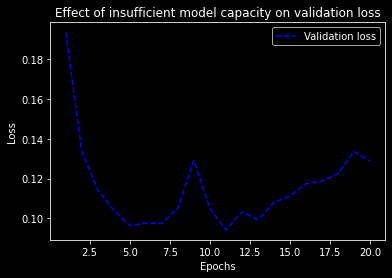

In [14]:
import matplotlib.pyplot as plt

val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--", label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

记住,无论何种情况下,一个正常的机器学习模型都可以到过拟合的状态.验证损失无法显示过拟合,很有可能是模型的容量不足.

当换加到 3 层时,随着训练到 7~8 轮次,就到达了欠拟合/过拟合的分界.
